<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-баланс-классов" data-toc-modified-id="Исследуем-баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем баланс классов</a></span></li><li><span><a href="#Исследуем-модель-дерева-решений-без-учета-дисбаланса" data-toc-modified-id="Исследуем-модель-дерева-решений-без-учета-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследуем модель дерева решений без учета дисбаланса</a></span></li><li><span><a href="#Исследуем-модель-случайного-леса-без-учета-дисбаланса" data-toc-modified-id="Исследуем-модель-случайного-леса-без-учета-дисбаланса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем модель случайного леса без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Поиск-лучшей-модели-дерева-решений" data-toc-modified-id="Поиск-лучшей-модели-дерева-решений-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Поиск лучшей модели дерева решений</a></span></li><li><span><a href="#Поиск-модели-случайного-леса" data-toc-modified-id="Поиск-модели-случайного-леса-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Поиск модели случайного леса</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Поиск-модели-дерева-решений" data-toc-modified-id="Поиск-модели-дерева-решений-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Поиск модели дерева решений</a></span></li><li><span><a href="#Поиск-модели-случайного-леса" data-toc-modified-id="Поиск-модели-случайного-леса-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Поиск модели случайного леса</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd   # Загружаем нужные нам библиотеки
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('D:/Project/Churn.csv')  # Загружаем файл и сохраняем его в переменную df

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info() # Посмотрим общюю информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.corr() # посмотрим есть ли кореляция между какими то столбами

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [5]:
df = df.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1) # удаляем ненужные нам столбцы

df['Tenure'] = df['Tenure'].fillna(1)  # заменим пропуски на минимальное значение

df.head() # проверим, что все получилось

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df_ohe = pd.get_dummies(df, drop_first = True) # применим технику прямого кодирования

df_ohe.head()  # проверим, что все получилось

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [7]:
X = df_ohe.drop(['Exited'], axis= 1) # разобьем датафрейм на признаки и целевой признак
y = df_ohe['Exited']

In [8]:
X.head() # проверим, что у нас получилось

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


In [9]:
y.head() # проверим, что у нас получилось

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
further_X, X_test, further_y, y_test = \
tts(X, y, random_state = 12345, test_size = 0.20, stratify = y) # разделим на дальнейшую выборку и тестовую

print('Дальнейшая выборка', further_X.shape, sep=': ')
print('Дальнейшая выборка', further_y.shape, sep = ': ')
print('Тестовая выборка', X_test.shape, sep= ': ')
print('Тестовая выборка', y_test.shape, sep = ': ')

Дальнейшая выборка: (8000, 11)
Дальнейшая выборка: (8000,)
Тестовая выборка: (2000, 11)
Тестовая выборка: (2000,)


In [11]:
X_train, X_valid, y_train, y_valid = \
tts(further_X, further_y, random_state = 12345, test_size = 0.25, stratify = further_y)

print('Обучающая выборка', X_train.shape, sep = ': ')  # дальше разделим на обучающюю и валидационную выборку
print('Обучающая выборка', y_train.shape, sep = ': ')
print('Валидвционная выборка', X_valid.shape , sep = ': ')
print('Валидационная выборка', y_valid.shape, sep = ': ')

Обучающая выборка: (6000, 11)
Обучающая выборка: (6000,)
Валидвционная выборка: (2000, 11)
Валидационная выборка: (2000,)


In [12]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',]

scaler = StandardScaler().fit(X_train[numeric])  # маштабируем признаки

X_train[numeric] = scaler.transform(X_train[numeric])

X_valid[numeric] = scaler.transform(X_valid[numeric])

X_test[numeric] = scaler.transform(X_test[numeric])



In [13]:
print(X_train[numeric].head(2))

print(X_valid[numeric].head(2))  # Проверим, что все получилось

print(X_test[numeric].head(2))

      CreditScore       Age    Tenure   Balance  NumOfProducts  \
5536    -0.143332  0.577533 -1.214405 -1.220573       0.797767   
8530     1.632702 -0.564119 -0.879566  0.435807      -0.916018   

      EstimatedSalary  
5536         1.029613  
8530         0.237986  
      CreditScore       Age    Tenure   Balance  NumOfProducts  \
9375     0.094161  0.862946 -0.209888  0.757050       0.797767   
9536    -1.031349  0.292120  1.799145  0.838881      -0.916018   

      EstimatedSalary  
9375        -0.308325  
9536        -0.645029  
      CreditScore       Age    Tenure   Balance  NumOfProducts  \
7837     2.066384  0.862946 -0.879566 -1.220573      -0.916018   
9505     0.011555 -1.039807  1.799145  0.052520      -0.916018   

      EstimatedSalary  
7837         1.202714  
9505        -0.443548  


Загрузили файл и посмотрели информацию о нем. Столбцы 'Surname', 'CustomerId', 'RowNumber' были удалены из даафрейма поскольку я считаю что они мало полезны в нашем исследовании и мало влияют на уход клиента. Пропуски в столбце 'Tenure'  были заполнены минимальным значением в один год, поскольку это кажеться более логичным вариантом чем заполнение средним или медианой. С помощью техники прямого кодирования сделали все категоральные признаки численные. Разделили датафрейм на признаки и целевые признаки. Потом стандартизировали признаки и разделили датафрейм в соотношении 3:1:1  на обучающюю, тестовую и валидационную выборку.

## Исследование задачи

### Исследуем баланс классов

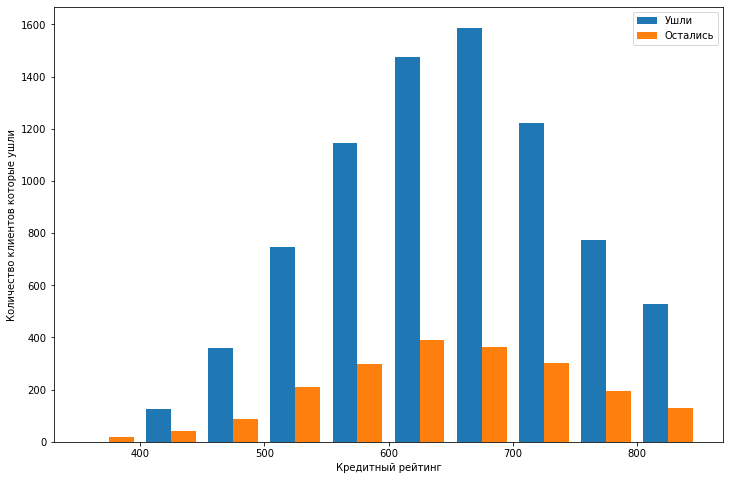

In [14]:
creditscore_0 = df[df['Exited'] == 0].CreditScore

creditscore_1 = df[df['Exited'] == 1].CreditScore  # посмотрим на дисбаланс в кредитном рейтинге

plt.figure(figsize = (12, 8))
plt.ylabel('Количество клиентов которые ушли')
plt.xlabel('Кредитный рейтинг')
plt.hist([creditscore_0, creditscore_1], label =['Ушли', 'Остались'])
plt.legend()
plt.show()

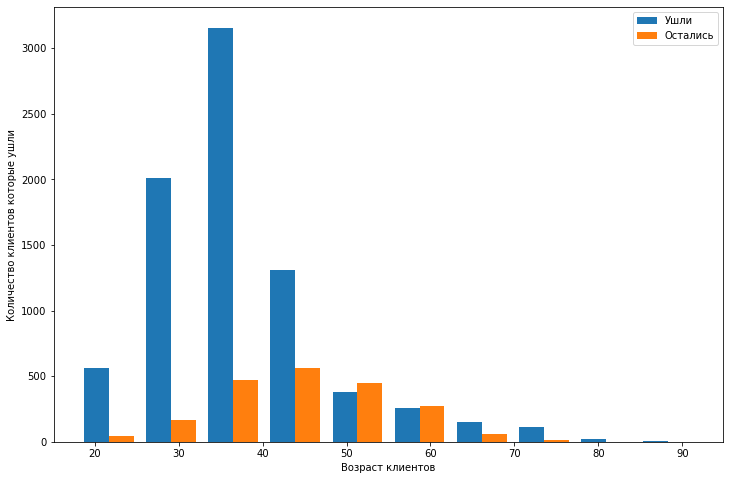

In [15]:
age_0 = df[df['Exited'] == 0].Age

age_1 = df[df['Exited'] == 1].Age # посмотрим на дисбаданс в возрасте клиентов

plt.figure(figsize = (12, 8))
plt.ylabel('Количество клиентов которые ушли')
plt.xlabel('Возраст клиентов')
plt.hist([age_0, age_1], label =['Ушли', 'Остались'])
plt.legend()
plt.show()

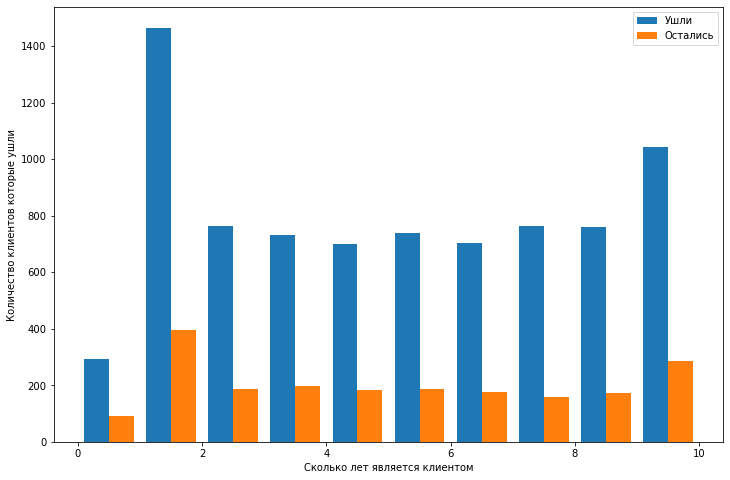

In [16]:
tenure_0 = df[df['Exited'] == 0].Tenure

tenure_1 = df[df['Exited'] == 1].Tenure  # посмотрим на дисбаланс в том сколько клиент является клиентом банка

plt.figure(figsize = (12, 8))
plt.ylabel('Количество клиентов которые ушли')
plt.xlabel('Сколько лет является клиентом')
plt.hist([tenure_0, tenure_1], label =['Ушли', 'Остались'])
plt.legend()
plt.show()

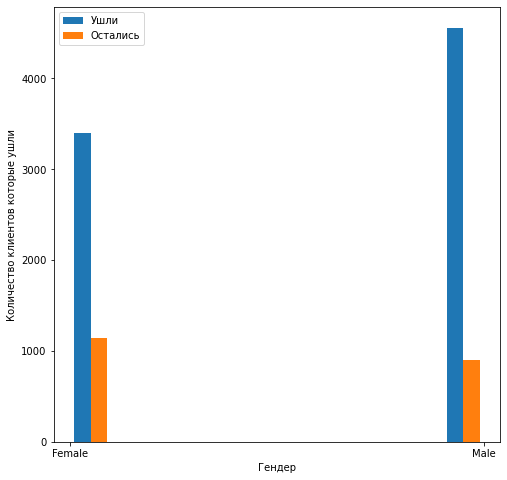

In [17]:
gender_0 = df[df['Exited'] == 0].Gender

gender_1 = df[df['Exited'] == 1].Gender  # посмотрим на дисбаланс в гендере

plt.figure(figsize = (8, 8))
plt.ylabel('Количество клиентов которые ушли')
plt.xlabel('Гендер')
plt.hist([gender_0, gender_1], label =['Ушли', 'Остались'])
plt.legend()
plt.show()

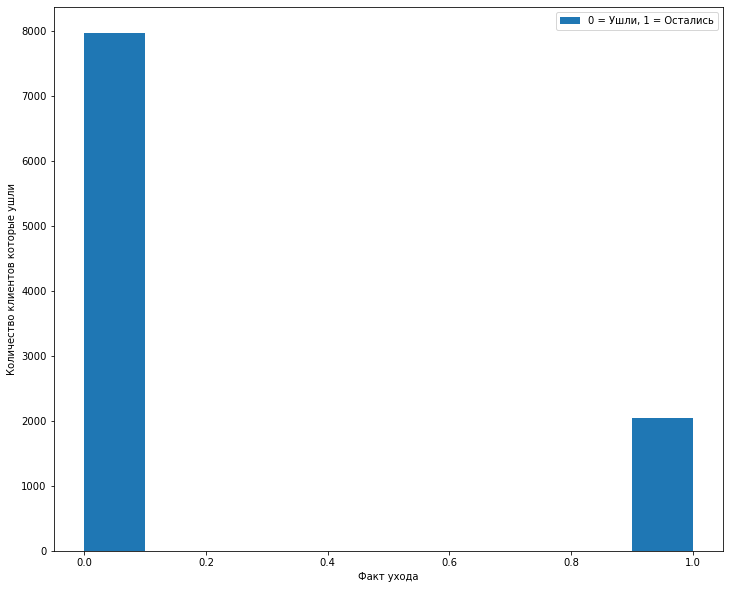

In [18]:
plt.figure(figsize = (12, 10))
plt.ylabel('Количество клиентов которые ушли')  # посмотрим в целом на дисбаланс ушедших и тех кто остался
plt.xlabel('Факт ухода')
plt.hist(df['Exited'], label = '0 = Ушли, 1 = Остались')
plt.legend()
plt.show()

В целом из выше изложеный графиков видно, что присутствует дисбаланс. В датафрейме в 4 раза больше тех кто остался.

### Исследуем модель дерева решений без учета дисбаланса

In [19]:
best_model_decision = None   # попробуем найти лучшую модель дерева решений без учета дисбаланса

best_decision_f1 = 0

for leaf in range(1, 201):
        model = DecisionTreeClassifier\
        (random_state = 12345, min_samples_leaf = leaf).fit(X_train, y_train)
        predictions = model.predict(X_valid)
        result = f1_score(y_valid, predictions)
        if result > best_decision_f1:
            best_decision_f1 = result
            best_model_decision = model
       
        
        
print('Лучшая f1-мера', best_decision_f1, sep = ': ')
print('Лучшая модель', best_model_decision, sep = ': ')

probabilities_decision = best_model_decision.predict_proba(X_valid)
probabilities_one_decision = probabilities_decision[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_decision)

print('Метрика AUC-ROC', auc_roc, sep =': ')

Лучшая f1-мера: 0.5868945868945868
Лучшая модель: DecisionTreeClassifier(min_samples_leaf=17, random_state=12345)
Метрика AUC-ROC: 0.8137783392020681


### Исследуем модель случайного леса без учета дисбаланса

In [20]:
best_model_random = None  # попробуем найти лучшую модель случайного леса без учета дисбаланса

best_random_f1 = 0

for depth in range(1, 201):
        model = RandomForestClassifier\
        (random_state = 12345, max_depth = depth, n_jobs = -1, max_features = 'sqrt').fit(X_train, y_train)
        predictions = model.predict(X_valid)
        result = f1_score(y_valid, predictions)
        if result > best_random_f1:
            best_random_f1 = result
            best_model_random = model
        
print('Лучшая f1-мера', best_random_f1, sep = ': ')
print('Лучшая модель', best_model_random, sep = ': ')

probabilities_random = best_model_random.predict_proba(X_valid)
probabilities_one_random = probabilities_random[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_random)

print('Метрика AUC-ROC', auc_roc, sep =': ')

Лучшая f1-мера: 0.571870170015456
Лучшая модель: RandomForestClassifier(max_depth=18, max_features='sqrt', n_jobs=-1,
                       random_state=12345)
Метрика AUC-ROC: 0.8520269113489453


Если искать модель без учета дисбаланса то она явно имеет низкую f1 меру, в принципе ее можно повысить если увеличивать количество гиперпараметров. Но это приводит к увелечению времени ее поиска.

## Борьба с дисбалансом

### Увеличение выборки

In [21]:
def upsample(X, y, repeat):  # попробуем метод увеличения выборки
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]

    X_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    y_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(
        X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, 4)

In [22]:
y_upsampled.value_counts()

1    4892
0    4777
Name: Exited, dtype: int64

#### Поиск лучшей модели дерева решений

In [23]:
best_decision_up = None  # поищем лучшую модель дерева решений с учетом дибаланса и методом увелечения выборки

best_decision_f1_up = 0


for leaf in range(1, 201):
    for features in range(1,12):
        model = DecisionTreeClassifier\
        (random_state = 12345, min_samples_leaf = leaf, max_features = features, class_weight = 'balanced')\
        .fit(X_upsampled, y_upsampled)
        predictions = model.predict(X_valid)
        result = f1_score(y_valid, predictions)
        if result > best_decision_f1_up:
            best_decision_f1_up = result
            best_decision_up = model
       
        
        
print('Лучшая f1-мера', best_decision_f1_up, sep = ': ')
print('Лучшая модель', best_decision_up, sep = ': ')

probabilities_up = best_decision_up.predict_proba(X_valid)
probabilities_one_up = probabilities_up[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_up)

print('Метрика AUC-ROC', auc_roc, sep =': ')

Лучшая f1-мера: 0.6119257086999023
Лучшая модель: DecisionTreeClassifier(class_weight='balanced', max_features=6,
                       min_samples_leaf=55, random_state=12345)
Метрика AUC-ROC: 0.8417593248101722


#### Поиск модели случайного леса

In [24]:
# попробуем найти лучшую модель случайного леса с учетом дисбаланса и метода увеличения выборки
best_random_up = None

best_random_f1_up = 0

for depth in range(1, 201):
        model = RandomForestClassifier\
        (random_state = 12345, max_depth = depth, n_jobs = -1, max_features = 'sqrt', class_weight ='balanced')\
        .fit(X_upsampled, y_upsampled)
        predictions = model.predict(X_valid)
        result = f1_score(y_valid, predictions)
        if result > best_random_f1_up:
            best_random_f1_up = result
            best_random_up = model
        
print('Лучшая f1-мера', best_random_f1_up, sep = ': ')
print('Лучшая модель', best_random_up, sep = ': ')

probabilities_random_up = best_model_random.predict_proba(X_valid)
probabilities_one_random_up = probabilities_random_up[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_random_up)

print('Метрика AUC-ROC', auc_roc, sep =': ')

Лучшая f1-мера: 0.6319218241042346
Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', n_jobs=-1, random_state=12345)
Метрика AUC-ROC: 0.8520261401617334


### Уменьшение выборки

In [25]:
def downsample(X, y, fraction):  # попробуем метод уменьшения выборки
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]

    X_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    y_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

X_downsampled, y_downsampled = downsample(X_train, y_train, 0.26)

In [26]:
y_downsampled.value_counts()

0    1242
1    1223
Name: Exited, dtype: int64

#### Поиск модели дерева решений

In [27]:
# попробуем найти лучшую модель дерева решений с учетом дисбаланса и метода уменьшения выборки
best_decision_down = None  

best_decision_f1_down = 0


for leaf in range(1, 201):
    for features in range(1,12):
        model = DecisionTreeClassifier\
        (random_state = 12345, min_samples_leaf = leaf, max_features = features, class_weight = 'balanced')\
        .fit(X_downsampled, y_downsampled)
        predictions = model.predict(X_valid)
        result = f1_score(y_valid, predictions)
        if result > best_decision_f1_down:
            best_decision_f1_down = result
            best_decision_down = model
       
        
        
print('Лучшая f1-мера', best_decision_f1_down, sep = ': ')
print('Лучшая модель', best_decision_down, sep = ': ')

probabilities_down = best_decision_down.predict_proba(X_valid)
probabilities_one_down = probabilities_down[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_down)

print('Метрика AUC-ROC', auc_roc, sep =': ')

Лучшая f1-мера: 0.5888993414863594
Лучшая модель: DecisionTreeClassifier(class_weight='balanced', max_features=9,
                       min_samples_leaf=40, random_state=12345)
Метрика AUC-ROC: 0.8475108390362627


#### Поиск модели случайного леса

In [ ]:
# попробуем найти лучшую модель случайного леса с учетом дисбаланса и метода уменьшения выборки
best_random_down = None  

best_random_f1_down = 0

for depth in range(1, 201):
        model = RandomForestClassifier\
        (random_state = 12345, max_depth = depth, n_jobs = -1, max_features = 'sqrt', class_weight = 'balanced').fit(X_downsampled, y_downsampled)
        predictions = model.predict(X_valid)
        result = f1_score(y_valid, predictions)
        if result > best_random_f1_down:
            best_random_f1_down = result
            best_random_down = model
        
print('Лучшая f1-мера', best_random_f1_down, sep = ': ')
print('Лучшая модель', best_random_down, sep = ': ')

probabilities_random_down = best_model_random.predict_proba(X_valid)
probabilities_one_random_down = probabilities_random_down[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_random_down)

print('Метрика AUC-ROC', auc_roc, sep = ': ')

В целом метод увелечения выборки показал лучшие результаты при одинаковых условиях поиска моделей.

## Тестирование модели

In [ ]:
# проверяем выбранную модель на тестовой выборке
model = best_random_up.fit(X_upsampled, y_upsampled)
predictions = model.predict(X_test) 

print('F1-мера', f1_score(y_test, predictions), sep =': ')

probabilities = model.predict_proba(X_test)
probabilities_one = probabilities[:, 1]

auc_roc = roc_auc_score(y_test, probabilities_one)

print('Метрика AUC-ROC', auc_roc, sep = ': ')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one) # построим график Roc-кривой

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Важность признаков')
plt.ylabel('Важность')
plt.bar(X_upsampled.columns, model.feature_importances_)
plt.show()

Была выбрана модель случайного леса с методом увелечения выборки. На тестовой выборке модель показала F1-меру 0.61, что приемлемо для нашего исследования.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*